In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# calculate transition from pixelNumThreshold

def transition(NumPixel):
    NumPixel = np.asarray(NumPixel)
    PixelNumThreshold = 500
    motion = (NumPixel > PixelNumThreshold)
    FrameIdx = np.array(range(len(motion)-1))
    mothIN = FrameIdx[motion[1:] & ~motion[:-1]]+1
    mothOUT = FrameIdx[~motion[1:] & motion[:-1]]+1
    return(mothIN, mothOUT)


def smooth(Pixels):
    win_gauss = signal.gaussian(10,3)
    smooth_Pixels = signal.convolve(Pixels, win_gauss, mode='same', method = 'direct') / win_gauss.sum()
    return(smooth_Pixels)

In [4]:
path = '.\\'
data_files = [(os.path.join(root, name), name[0:-4])
               for root, dirs, files in os.walk(path)
               for name in files
               if name.endswith('.csv')]
len(data_files)

2

working on c-1_m4
done with c-1_m4
working on c-2_m4
done with c-2_m4


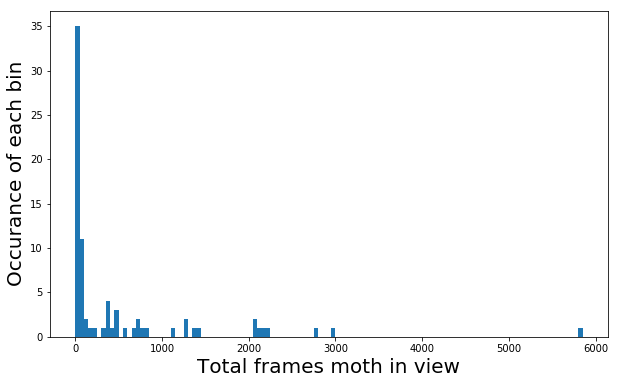

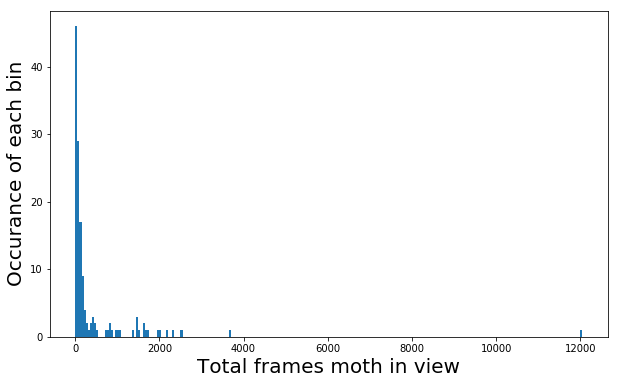

In [9]:
for video in data_files:
    # read the details of the file and load the csv data
    filename = video[1]
    print('working on ' + filename)
#     with open('Step2_SummaryFile.txt', 'a') as log_text:
#         log_text.write('\n' + 'working on ' + filename + '\n')
    df = pd.read_csv(video[0])
    
    PixelCount = np.asarray(df.NumPixel)
    Smoothened_PixelCount = smooth(PixelCount) # smoothen the Numpixels across frames
    In,Out = transition(Smoothened_PixelCount) # pull out the moth going in and out of the frame
    
    if In.size > Out.size:
        In = In[:Out.size]
    elif Out.size > In.size: 
        Out = Out[1:]
    
    FramesMothInView = Out - In
    
    #save the data in a new dataframe
    d = {'MothIN': In, 'MothOut': Out, "FramesInView" : FramesMothInView}
    new_df = pd.DataFrame(data=d)
    cols = new_df.columns.tolist()
    cols[0], cols[1], cols[2] = cols[1], cols[2], cols[0]
    new_df = new_df.reindex(columns= cols)

    # save the newDf in a separte csv file
#     outPath_data = ".\\"
#     new_df.to_csv(outPath_data + filename + '_MothInOut.csv')
    
    if FramesMothInView.size==0:
        print(filename + " has no moth movement")
#         with open('Step2_SummaryFile.txt', 'a') as log_text:
#             log_text.write(filename + " has no moth movement" + '\n')
    else:
        # export figure for histogram
        binwidth = 50
        fig, ax = plt.subplots(1,1, figsize = (10,6))
        plt.hist(FramesMothInView, bins=range(min(FramesMothInView), max(FramesMothInView) + binwidth, binwidth))
        plt.xlabel("Total frames moth in view", fontsize = 20)
        plt.ylabel("Occurance of each bin", fontsize = 20)

#         outPath_fig = '.\\'
#         plt.savefig(outPath_fig + filename + '_histogram.png')

        print('done with ' + filename)
#         with open('Step2_SummaryFile.txt', 'a') as log_text:
#             log_text.write('done with ' + filename + '\n')